In [15]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [16]:
data

{'status': {'timestamp': '2022-06-10T08:34:17.832Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 25,
  'credit_count': 1,
  'notice': None,
  'total_count': 10014},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 9526,
   'date_added': '2013-04-28T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfolio

In [17]:
type(data)

dict

In [18]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [19]:
df=pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906356e+07,1.906356e+07,NaN,1,NaN,NaN,2022-06-10T08:34:00.000Z,30028.912621,2.467048e+10,3.3621,-0.156818,-1.275703,-1.496009,-2.329756,-28.849354,-23.005604,5.724579e+11,46.3493,6.306072e+11,2022-06-10T08:34:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211175e+08,1.211175e+08,NaN,2,NaN,NaN,2022-06-10T08:34:00.000Z,1788.300850,1.273202e+10,-8.5101,0.025915,-1.122921,-1.456398,-23.146414,-43.463224,-30.628392,2.165945e+11,17.5367,2.165945e+11,2022-06-10T08:34:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34539,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249748e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-10T08:33:00.000Z,0.999300,4.156977e+10,-10.3868,-0.002348,-0.000519,-0.009481,-0.055672,-0.104500,-0.081792,7.244676e+10,5.8657,7.965485e+10,2022-06-10T08:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4341,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.381563e+10,5.381563e+10,NaN,4,NaN,NaN,2022-06-10T08:33:00.000Z,1.000133,3.446201e+09,-7.3715,0.000740,-0.029604,0.017656,0.034809,0.056610,0.031980,5.382276e+10,4.3574,5.382276e+10,2022-06-10T08:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,944,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-10T08:33:00.000Z,289.755134,8.753050e+08,-4.8632,-0.272754,-0.507720,-4.993539,-4.925701,-30.397063,-22.647740,4.731034e+10,3.8304,4.784343e+10,2022-06-10T08:33:00.000Z,NaN,NaN,NaN,NaN,NaN
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-10T08:33:00.000Z,0.621592,9.035220e+08,-40.5255,-0.029069,-4.583174,5.870471,1.365690,-38.541955,-21.553031,2.109312e+10,1.7077,2.797163e+10,2022-06-10T08:33:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47
6,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-10T08:34:00.000Z,0.406351,1.055908e+09,6.6026,0.163105,0.979419,0.653490,-18.594851,-44.894735,-48.095687,1.964428e+10,1.5905,4.063513e+10,2022-06-10T08:34:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe
7,4687,Binance USD,BUSD,binance-usd,3824,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.797731e+10,1.797731e+10,NaN,8,NaN,NaN,2022-06-10T08:34:00.000Z,1.001369,4.346613e+09,-4.5325,-0.016255,0.117958,0.095657,-0.032637,0.127938,0.112787,1.800191e+10,1.4574,1.800191e+10,2022-06-10T08:34:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.419116e+08,5.116169e+08,NaN,9,NaN,NaN,2022-06-10T08:33:00.000Z,40.368652,1.300059e+09,35.5633,0.214798,1.085333,0.455156,-35.860036,-63.382710,-50.026456,1.380251e+10,1.1174,2.065329e+10,2022-06-10T08:33:00.000Z,NaN,NaN,NaN,NaN,NaN
9,74,Dogecoin,DOGE,dogecoin,483,2013-12-15T00:0

In [20]:
###creating timedtamp to know the time of data collected
df['timestamp'] = pd.to_datetime('now')

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906356e+07,1.906356e+07,NaN,1,NaN,NaN,2022-06-10T08:34:00.000Z,30028.912621,2.467048e+10,3.3621,-0.156818,-1.275703,-1.496009,-2.329756,-28.849354,-23.005604,5.724579e+11,46.3493,6.306072e+11,2022-06-10T08:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 08:34:44.058452
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211175e+08,1.211175e+08,NaN,2,NaN,NaN,2022-06-10T08:34:00.000Z,1788.300850,1.273202e+10,-8.5101,0.025915,-1.122921,-1.456398,-23.146414,-43.463224,-30.628392,2.165945e+11,17.5367,2.165945e+11,2022-06-10T08:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 08:34:44.058452
2,825,Tether,USDT,tether,34539,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249748e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-10T08:33:00.000Z,0.999300,4.156977e+10,-10.3868,-0.002348,-0.000519,-0.009481,-0.055672,-0.104500,-0.081792,7.244676e+10,5.8657,7.965485e+10,2022-06-10T08:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-10 08:34:44.058452
3,3408,USD Coin,USDC,usd-coin,4341,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.381563e+10,5.381563e+10,NaN,4,NaN,NaN,2022-06-10T08:33:00.000Z,1.000133,3.446201e+09,-7.3715,0.000740,-0.029604,0.017656,0.034809,0.056610,0.031980,5.382276e+10,4.3574,5.382276e+10,2022-06-10T08:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-10 08:34:44.058452
4,1839,BNB,BNB,bnb,944,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-10T08:33:00.000Z,289.755134,8.753050e+08,-4.8632,-0.272754,-0.507720,-4.993539,-4.925701,-30.397063,-22.647740,4.731034e+10,3.8304,4.784343e+10,2022-06-10T08:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 08:34:44.058452
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-10T08:33:00.000Z,0.621592,9.035220e+08,-40.5255,-0.029069,-4.583174,5.870471,1.365690,-38.541955,-21.553031,2.109312e+10,1.7077,2.797163e+10,2022-06-10T08:33:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-10 08:34:44.058452
6,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-10T08:34:00.000Z,0.406351,1.055908e+09,6.6026,0.163105,0.979419,0.653490,-18.594851,-44.894735,-48.095687,1.964428e+10,1.5905,4.063513e+10,2022-06-10T08:34:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-10 08:34:44.058452
7,4687,Binance USD,BUSD,binance-usd,3824,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.797731e+10,1.797731e+10,NaN,8,NaN,NaN,2022-06-10T08:34:00.000Z,1.001369,4.346613e+09,-4.5325,-0.016255,0.117958,0.095657,-0.032637,0.127938,0.112787,1.800191e+10,1.4574,1.800191e+10,2022-06-10T08:34:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-10 08:34:44.058452
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.419116e+08,5.116169e+08,NaN,9,NaN,NaN,2022-06-10T08:3

In [28]:
def api_runner():





     url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
     parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


df2=pd.json_normalize(data['data'])
###creating timedtamp to know the time of data collected
df2['timestamp'] = pd.to_datetime('now')
df = df.append(df2)

In [ ]:
##if lopp dosent run for second iteration try defing df to global==== global df

In [29]:
import os
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print('API has run sucessfully')
    sleep(60)
exit()  

API has run sucessfully
API has run sucessfully
API has run sucessfully
API has run sucessfully
API has run sucessfully
API has run sucessfully


KeyboardInterrupt: 

In [31]:
df.shape

(60, 34)

In [34]:
column_names=df.columns

In [35]:
df.to_csv(r"C:/Users/DELL/Downloads/file3.csv", header=column_names,index=False)

In [36]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [37]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19063556.00000,19063556.00000,NaN,1,NaN,NaN,2022-06-10T08:42:00.000Z,30028.29803,24728181996.39433,3.52300,-0.26749,-1.34239,-1.41797,-2.49930,-28.74578,-23.18582,572446141112.61426,46.39050,630594258666.37000,2022-06-10T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 08:42:49.109047
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121117503.68650,121117503.68650,NaN,2,NaN,NaN,2022-06-10T08:41:00.000Z,1786.56628,12725490105.77763,-8.51870,-0.21279,-1.28474,-1.51440,-23.32777,-43.39465,-30.78679,216384448270.60739,17.53560,216384448270.60999,2022-06-10T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 08:42:49.109047
2,825,Tether,USDT,tether,34540,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72497481448.78677,79710622660.05101,NaN,3,NaN,NaN,2022-06-10T08:41:00.000Z,0.99932,41632159173.67247,-10.25320,0.00512,-0.00143,-0.00826,-0.03449,-0.10170,-0.07470,72448086823.21042,5.87110,79656313513.28000,2022-06-10T08:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-10 08:42:49.109047
3,3408,USD Coin,USDC,usd-coin,4341,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53815631787.34218,53815631787.34218,NaN,4,NaN,NaN,2022-06-10T08:41:00.000Z,0.99996,3444091816.19422,-7.46010,-0.00463,-0.04177,0.00997,-0.03095,0.03382,0.01109,53813406523.87301,4.35860,53813406523.87000,2022-06-10T08:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-10 08:42:49.109047
4,1839,BNB,BNB,bnb,944,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-10T08:41:00.000Z,289.49202,878675405.75799,-3.89660,-0.43754,-0.54102,-4.96298,-4.78325,-30.32537,-22.82724,47267381700.90035,3.82940,47799984889.61000,2022-06-10T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-10 08:42:49.109047
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,2022-06-10T08:41:00.000Z,0.61858,903183303.24853,-40.66530,-0.67102,-4.93617,5.37497,1.30450,-38.58958,-21.97310,20991027741.64093,1.70020,27836238019.22000,2022-06-10T08:41:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-10 08:42:49.109047
6,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,2022-06-10T08:42:00.000Z,0.40597,1056939889.44632,6.66720,0.00342,0.86749,0.67128,-18.91593,-44.76077,-48.32854,19625680567.25354,1.59040,40596652017.17000,2022-06-10T08:42:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-10 08:42:49.109047
7,4687,Binance USD,BUSD,binance-usd,3824,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17977306386.44926,17977306386.44926,NaN,8,NaN,NaN,2022-06-10T08:41:00.000Z,1.00083,4344779655.87127,-4.55620,0.13285,0.06056,-0.09169,-0.11004,0.23045,0.12553,17992301000.61645,1.45730,17992301000.62000,2022-06-10T08:41:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-10 

In [41]:
df3=df.groupby('name', sort=False).mean()
df3

,id,num_market_pairs,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,platform.id
name,,,,,,,,,,,,,,,,,,,,,,
Bitcoin,1.00000,9526.00000,21000000.00000,19063556.00000,19063556.00000,NaN,1.00000,NaN,NaN,30025.55160,24740699426.43119,3.45380,-0.22830,-1.42102,-1.39268,-3.07586,-28.78900,-23.20400,572393784332.50635,46.38687,630536583572.47668,NaN
Ethereum,1027.00000,5745.00000,NaN,121117503.68650,121117503.68650,NaN,2.00000,NaN,NaN,1786.35969,12713795520.79294,-8.63567,-0.20352,-1.39772,-1.45263,-23.71589,-43.44679,-30.82231,216359426725.55032,17.53380,216359426725.55331,NaN
Tether,825.00000,34540.00000,NaN,72497481448.78677,79710622660.05101,NaN,3.00000,NaN,NaN,0.99932,41645369835.02274,-10.27243,0.00335,-0.00260,-0.00656,-0.03679,-0.10290,-0.07510,72447864886.25006,5.87013,79656069494.68666,1027.00000
USD Coin,3408.00000,4341.00000,NaN,53815631787.34219,53815631787.34219,NaN,4.00000,NaN,NaN,0.99996,3460834639.51921,-6.89167,-0.00309,-0.04291,0.00163,-0.03297,0.03522,0.01235,53813292185.71067,4.35917,53813292185.71000,1027.00000
BNB,1839.00000,944.00000,165116760.00000,163276974.63000,163276974.63000,NaN,5.00000,NaN,NaN,289.44637,878583365.76814,-3.53987,-0.39227,-0.61848,-4.90122,-5.22016,-30.41613,-22.93733,47259927369.00928,3.82893,47792446563.20333,NaN
Cardano,2010.00000,454.00000,45000000000.00000,33934048405.59300,34277702081.60500,NaN,6.00000,NaN,NaN,0.61871,902171885.32576,-40.79127,-0.72383,-4.90320,5.56101,0.19230,-38.66925,-21.99474,20995261259.90211,1.70077,27841852095.07333,1839.00000
XRP,52.00000,737.00000,100000000000.00000,48343101197.00000,99989535142.00000,NaN,7.00000,NaN,NaN,0.40574,1057141525.08504,6.59770,-0.00555,0.72703,0.74643,-19.32405,-44.76865,-48.35014,19614712205.49592,1.58953,40573963440.13000,1839.00000
Binance USD,4687.00000,3824.66667,NaN,17977306386.44926,17977306386.44926,NaN,8.00000,NaN,NaN,1.00100,4340463089.59023,-4.71673,0.09753,0.08282,-0.08491,-0.11546,0.24742,0.09222,17995295957.20124,1.45773,17995295957.20333,1839.00000
Solana,5426.00000,327.00000,NaN,341911565.19805,511616946.14229,NaN,9.00000,NaN,NaN,40.08862,1287222006.40298,31.75907,-0.68205,0.02266,0.26142,-36.04335,-63.48041,-50.51798,13706763629.04249,1.11020,20510018563.78333,NaN


In [44]:
df4=df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.22830,-1.42102,-1.39268,-3.07586,-28.78900,-23.20400
Ethereum,-0.20352,-1.39772,-1.45263,-23.71589,-43.44679,-30.82231
Tether,0.00335,-0.00260,-0.00656,-0.03679,-0.10290,-0.07510
USD Coin,-0.00309,-0.04291,0.00163,-0.03297,0.03522,0.01235
BNB,-0.39227,-0.61848,-4.90122,-5.22016,-30.41613,-22.93733
Cardano,-0.72383,-4.90320,5.56101,0.19230,-38.66925,-21.99474
XRP,-0.00555,0.72703,0.74643,-19.32405,-44.76865,-48.35014
Binance USD,0.09753,0.08282,-0.08491,-0.11546,0.24742,0.09222
Solana,-0.68205,0.02266,0.26142,-36.04335,-63.48041,-50.51798


In [45]:
df5=df4.stack()
df5

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.22830
          quote.USD.percent_change_24h    -1.42102
          quote.USD.percent_change_7d     -1.39268
          quote.USD.percent_change_30d    -3.07586
          quote.USD.percent_change_60d   -28.78900
                                            ...   
Litecoin  quote.USD.percent_change_24h    -3.43302
          quote.USD.percent_change_7d     -6.38582
          quote.USD.percent_change_30d   -23.86486
          quote.USD.percent_change_60d   -45.04114
          quote.USD.percent_change_90d   -43.55952
Length: 120, dtype: float64

In [48]:
type(df4)


pandas.core.frame.DataFrame

In [47]:
type(df5)

pandas.core.series.Series

In [49]:
df6=df5.to_frame(name='values')
df6

values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.22830
         quote.USD.percent_change_24h  -1.42102
         quote.USD.percent_change_7d   -1.39268
         quote.USD.percent_change_30d  -3.07586
         quote.USD.percent_change_60d -28.78900
...                                         ...
Litecoin quote.USD.percent_change_24h  -3.43302
         quote.USD.percent_change_7d   -6.38582
         quote.USD.percent_change_30d -23.86486
         quote.USD.percent_change_60d -45.04114
         quote.USD.percent_change_90d -43.55952

[120 rows x 1 columns]

In [50]:
     df6.count()

values    120
dtype: int64

In [55]:
index = pd.Index(range(120))

df7=df6.reset_index()
df7

###df7=df6.set_index(index)

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.22830
1,Bitcoin,quote.USD.percent_change_24h,-1.42102
2,Bitcoin,quote.USD.percent_change_7d,-1.39268
3,Bitcoin,quote.USD.percent_change_30d,-3.07586
4,Bitcoin,quote.USD.percent_change_60d,-28.78900
...,...,...,...
115,Litecoin,quote.USD.percent_change_24h,-3.43302
116,Litecoin,quote.USD.percent_change_7d,-6.38582
117,Litecoin,quote.USD.percent_change_30d,-23.86486
118,Litecoin,quote.USD.percent_change_60d,-45.04114


In [63]:
df8=df7.rename(columns={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.22830
1,Bitcoin,quote.USD.percent_change_24h,-1.42102
2,Bitcoin,quote.USD.percent_change_7d,-1.39268
3,Bitcoin,quote.USD.percent_change_30d,-3.07586
4,Bitcoin,quote.USD.percent_change_60d,-28.78900
...,...,...,...
115,Litecoin,quote.USD.percent_change_24h,-3.43302
116,Litecoin,quote.USD.percent_change_7d,-6.38582
117,Litecoin,quote.USD.percent_change_30d,-23.86486
118,Litecoin,quote.USD.percent_change_60d,-45.04114


In [65]:
df8['percent_change'].unique()

array(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
      dtype=object)

In [75]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.22830
1,Bitcoin,24h,-1.42102
2,Bitcoin,7d,-1.39268
3,Bitcoin,30d,-3.07586
4,Bitcoin,60d,-28.78900
...,...,...,...
115,Litecoin,24h,-3.43302
116,Litecoin,7d,-6.38582
117,Litecoin,30d,-23.86486
118,Litecoin,60d,-45.04114


# visualize

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

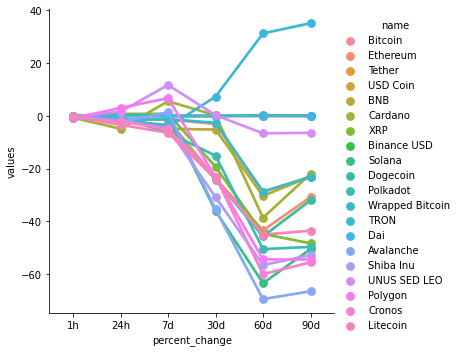

In [77]:
sns.catplot(x='percent_change',y='values', hue='name', data=df8, kind='point')

In [ ]:
#now we can create any number  of visulization using dataframe and take various type of columns from original dataframe(df) into account